In [1]:
!pip install tensorflow keras matplotlib numpy pandas

In [3]:
!git clone https://github.com/maria-2025-senati/Precios_vivienda.git

Cloning into 'Precios_vivienda'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [4]:
from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing.csv


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4723 - mae: 0.5001 - val_loss: 0.3147 - val_mae: 0.3975
Epoch 2/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2822 - mae: 0.3811 - val_loss: 0.2957 - val_mae: 0.3833
Epoch 3/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2635 - mae: 0.3637 - val_loss: 0.2820 - val_mae: 0.3752
Epoch 4/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2511 - mae: 0.3551 - val_loss: 0.2843 - val_mae: 0.3794
Epoch 5/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2564 - mae: 0.3530 - val_loss: 0.2672 - val_mae: 0.3644
Epoch 6/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2422 - mae: 0.3450 - val_loss: 0.2593 - val_mae: 0.3609
Epoch 7/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2263 - mae: 0.3357 - val_loss: 0.2575 - val_mae: 0.3516
Epoch 8/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2362 - mae: 0.3388 - val_loss: 0.2547 - val_mae: 0.3539
Epoch 9/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2288 

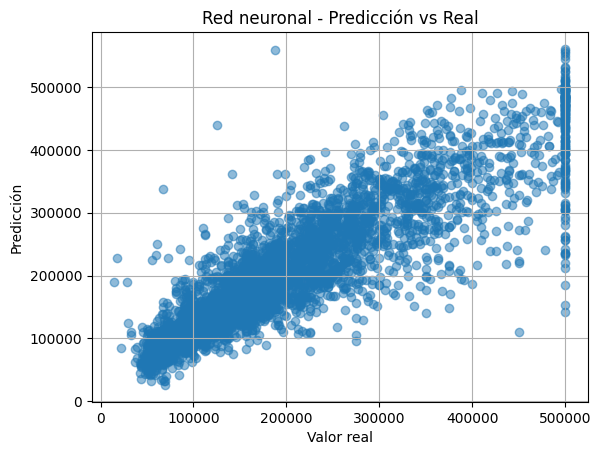

In [17]:
# 1. Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import tensorflow as tf
from tensorflow import keras

# 2. Cargar y preparar datos
df = pd.read_csv("housing.csv")

# 3. Eliminar columnas no numéricas
df = df.drop(columns=["ocean_proximity"])  # columna categórica

# 4. Imputar NaNs con la media
df = df.fillna(df.mean(numeric_only=True))

# 5. Separar características y variable objetivo
X = df.drop(columns=["median_house_value"])
y = df["median_house_value"]

# 6. División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 7. Escalar características
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# 8. Escalar etiquetas
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# 9. Crear modelo de red neuronal
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=[X_train_scaled.shape[1]]),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 10. Entrenar modelo
history = model.fit(X_train_scaled, y_train_scaled, validation_split=0.1, epochs=50, verbose=1)

# 11. Predecir con modelo
y_pred_scaled = model.predict(X_test_scaled).flatten()

# 12. Verificar valores nulos
print("¿Hay NaNs en y_pred_scaled?", np.any(np.isnan(y_pred_scaled)))
print("¿Hay NaNs en X_test_scaled?", np.any(np.isnan(X_test_scaled)))

# 13. Eliminar predicciones con NaN
mask = ~np.isnan(y_pred_scaled)
y_pred_scaled_clean = y_pred_scaled[mask]
y_test_scaled_clean = y_test_scaled[mask]

# 14. Inversión del escalado
y_pred_orig = scaler_y.inverse_transform(y_pred_scaled_clean.reshape(-1, 1)).flatten()
y_test_orig = scaler_y.inverse_transform(y_test_scaled_clean.reshape(-1, 1)).flatten()

# 15. Calcular MAE
mae_real = mean_absolute_error(y_test_orig, y_pred_orig)
print(f"\nMAE sin NaNs: {mae_real:.2f}")

# 16. Graficar resultados
plt.scatter(y_test_orig, y_pred_orig, alpha=0.5)
plt.xlabel("Valor real")
plt.ylabel("Predicción")
plt.title("Red neuronal - Predicción vs Real")
plt.grid(True)
plt.show()